## Importing Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import plotly.express as px
import plotly.graph_objects as go
from fbprophet import Prophet
from fbprophet.plot import plot as fbplot
sb.set()
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)

## Testing the Prophet Model on United States Dataset

### Dataset Preparation

In [2]:
covidDF = pd.read_excel("owid-covid-data.xlsx")

In [3]:
print("Data Dimensions:", covidDF.shape)
covidDF.head()

Data Dimensions: (178330, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
dateFrom = "2020-01-22"
dateTo = "2022-01-30"
country = "United States"
UScovidDF = covidDF.copy()
UScovidDF = UScovidDF.loc[UScovidDF['location'] == country, ['location','date','total_cases', 'new_cases', 
                                                             'total_cases_per_million', 'hosp_patients', 
                                                             'new_tests', 'people_fully_vaccinated', 
                                                             'stringency_index', 'population', 'gdp_per_capita']]

Train_US = UScovidDF.copy()
Train_US = Train_US[['date', 'new_cases']]
Train_US = Train_US[(Train_US['date'] >= dateFrom) & (Train_US['date'] <= dateTo)]
Train_US = Train_US.rename(columns={'date': 'ds', 'new_cases': 'y'})
Train_US = Train_US.reset_index(drop=True)
print("Data Dimensions: ", Train_US.shape)

Train_US.head()

Data Dimensions:  (740, 2)


,ds,y
0,2020-01-22,NaN
1,2020-01-23,0.0
2,2020-01-24,1.0
3,2020-01-25,0.0
4,2020-01-26,3.0


### COVID-19 Daily Cases in United States

Text(0, 0.5, 'New Cases Daily')

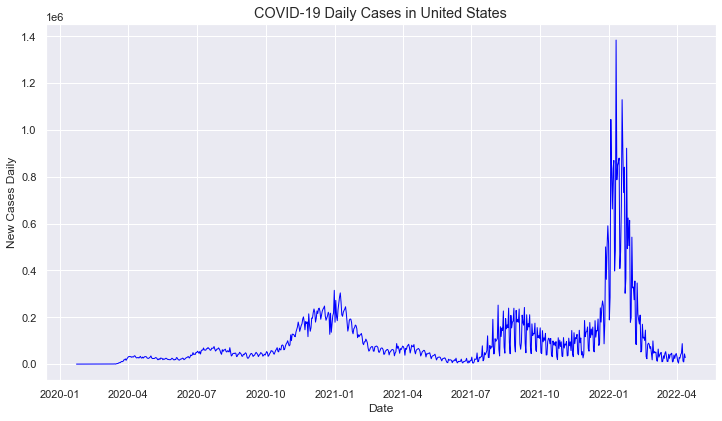

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(top=0.95)

ax.set_title('COVID-19 Daily Cases in United States', fontsize = 'large')
ax.plot(UScovidDF.date, UScovidDF.new_cases, color='blue', lw=1)

plt.xlabel('Date')
plt.ylabel('New Cases Daily')

### Training and Prediction of Prophet Model by Facebook

In [6]:
# instantiate the model and fit the timeseries
model_US = Prophet(daily_seasonality = True, changepoint_range = 1, changepoint_prior_scale = 0.5)
model_US.fit(Train_US)


# create a future data frame
future_US = model_US.make_future_dataframe(periods = 57)
forecast_US = model_US.predict(future_US)


# display the most critical output columns from the forecast
forecast_US[['ds','yhat','yhat_lower','yhat_upper']].head()

C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,98360.393224,23499.632031,169786.379358
1,2020-01-23,87059.609442,11129.668131,163395.543813
2,2020-01-24,89227.844641,20241.734382,161640.525368
3,2020-01-25,26613.295679,-38723.799117,102648.105911
4,2020-01-26,6528.121139,-66211.530191,73877.193008


C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


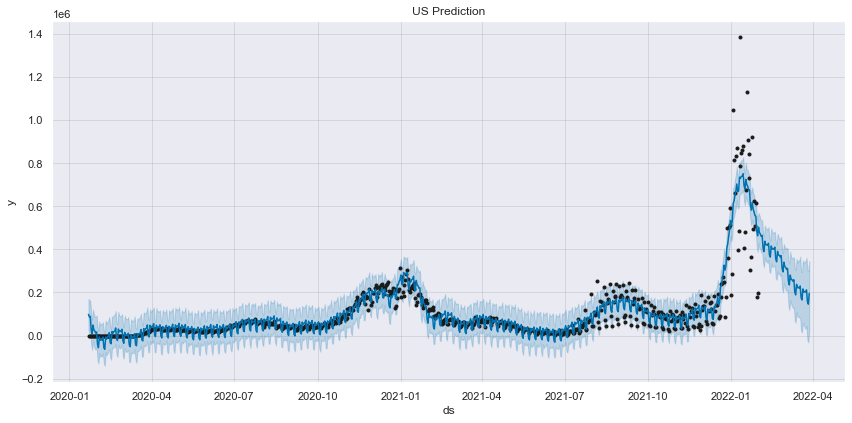

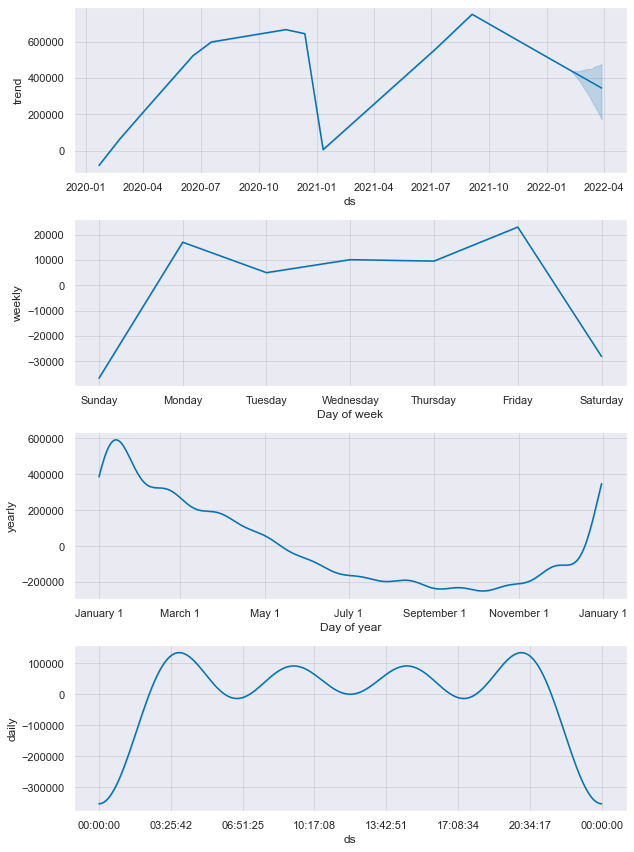

In [53]:
# plot

fig = fbplot(model_US, forecast_US, figsize=(12, 6))
ax = fig.gca()
ax.set_title("US Prediction")

fig = model_US.plot_components(forecast_US)

The Prophet Model is not only able to predict future values, it also has a trend analysis based on the dataset given to it.
From the trend analysis we can see the overall trend, weekly, yearly and daily.
An interesting analysis is that decrease in COVID-19 cases often happened during the weekends.

In [8]:
# instantiate the model with holidays of US and fit the timeseries
model_US_h = Prophet(daily_seasonality = True, changepoint_range = 1, changepoint_prior_scale = 0.5)
model_US_h.add_country_holidays(country_name='US')
model_US_h.fit(Train_US)

# create a future data frame 
future_US_h = model_US_h.make_future_dataframe(periods = 57)
forecast_US_h = model_US_h.predict(future_US_h)

# display the most critical output columns from the forecast
forecast_US_h[['ds','yhat','yhat_lower','yhat_upper']].head()

C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,92002.183695,17973.175918,160599.275937
1,2020-01-23,82474.528311,12764.388098,150451.701261
2,2020-01-24,88804.552624,18175.298609,159873.658189
3,2020-01-25,24152.011182,-48270.120697,95442.006408
4,2020-01-26,782.911048,-66068.162788,69457.738103


C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


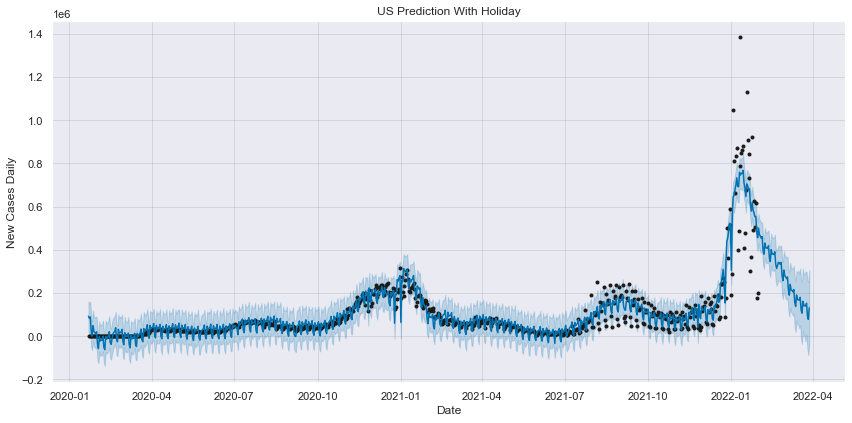

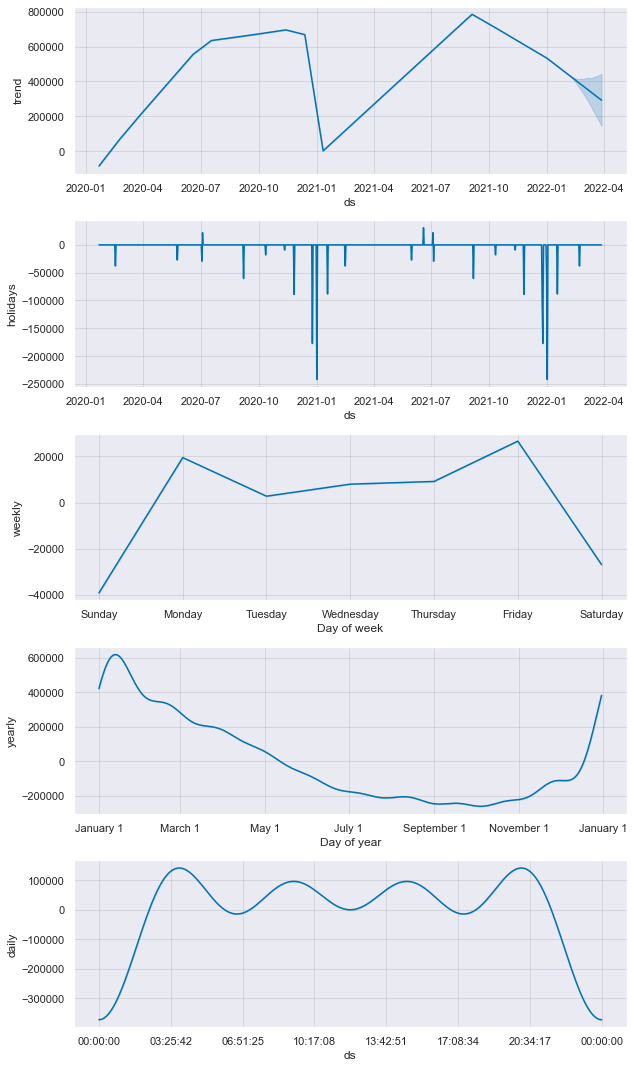

In [52]:
# plot

fig = fbplot(model_US_h, forecast_US_h, figsize=(12, 6), xlabel = 'Date', ylabel = 'New Cases Daily')
ax = fig.gca()
ax.set_title("US Prediction With Holiday")

fig = model_US_h.plot_components(forecast_US_h)

After adding holidays to the Prophet Model, we can see that contrary to what we thought, COVID-19 cases actually decrease during holidays. 

The Prohpet model by Facebook seems to have not much difference when prediciting the potential number of new cases daily whether the holiday is a factor or not, this could be due to the dataset only ranging from 2020 to early 2022. From further research, the Prohpet model needs more number of years of data to be able to properly determine how will holidays affect the result.

Additionally, the model might predict that the cases are negative so will we will manually change the negative numbers to zero as it shows that the daily covid is reducing everyday and in due course will reach zero covid cases.

In [10]:
# converting negative values to zero as daily covid cases cannot be negative

forecast_US_h0 = forecast_US_h.copy()
forecast_US_h0.loc[forecast_US_h0["yhat"] < 0, "yhat"] = 0
forecast_US_h0.loc[forecast_US_h0["yhat_lower"] < 0, "yhat_lower"] = 0
forecast_US_h0.loc[forecast_US_h0["yhat_upper"] < 0, "yhat_upper"] = 0
forecast_US_h0.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),Christmas Day (Observed)_lower,Christmas Day (Observed)_upper,Columbus Day,Columbus Day_lower,Columbus Day_upper,Independence Day,Independence Day_lower,Independence Day_upper,Independence Day (Observed),Independence Day (Observed)_lower,Independence Day (Observed)_upper,Juneteenth National Independence Day,Juneteenth National Independence Day_lower,Juneteenth National Independence Day_upper,Labor Day,Labor Day_lower,Labor Day_upper,Martin Luther King Jr. Day,Martin Luther King Jr. Day_lower,Martin Luther King Jr. Day_upper,Memorial Day,Memorial Day_lower,Memorial Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,New Year's Day (Observed),New Year's Day (Observed)_lower,New Year's Day (Observed)_upper,Thanksgiving,Thanksgiving_lower,Thanksgiving_upper,Veterans Day,Veterans Day_lower,Veterans Day_upper,Washington's Birthday,Washington's Birthday_lower,Washington's Birthday_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
792,2022-03-24,303585.757705,0.000000,298259.619643,171416.009347,437798.148159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-164337.229996,-164337.229996,-164337.229996,-373648.33161,-373648.33161,-373648.33161,0.0,0.0,0.0,9143.185607,9143.185607,9143.185607,200167.916008,200167.916008,200167.916008,0.0,0.0,0.0,139248.527709
793,2022-03-25,300790.534503,8437.285733,298819.717371,165901.663830,438641.949137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-148285.043353,-148285.043353,-148285.043353,-373648.33161,-373648.33161,-373648.33161,0.0,0.0,0.0,26579.846767,26579.846767,26579.846767,198783.441491,198783.441491,198783.441491,0.0,0.0,0.0,152505.491151
794,2022-03-26,297995.311301,0.000000,256328.822217,158495.425517,440305.298303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-203328.529175,-203328.529175,-203328.529175,-373648.33161,-373648.33161,-373648.33161,0.0,0.0,0.0,-26831.031159,-26831.031159,-26831.031159,197150.833594,197150.833594,197150.833594,0.0,0.0,0.0,94666.782126
795,2022-03-27,295200.088100,0.000000,251654.645226,150664.638837,442193.164831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-217495.616013,-217495.616013,-217495.616013,-373648.33161,-373648.33161,-373648.33161,0.0,0.0,0.0,-39080.039394,-39080.039394,-39080.039394,195232.754991,195232.754991,195232.754991,0.0,0.0,0.0,77704.472086
796,2022-03-28,292404.864898,0.000000,304866.515960,144896.170612,445558.868712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-161186.502544,-161186.502544,-161186.502544,-373648.33161,-373648.33161,-373648.33161,0.0,0.0,0.0,19460.064505,19460.064505,19460.064505,193001.764561,193001.764561,193001.764561,0.0,0.0,0.0,131218.362354


Text(0, 0.5, 'New Cases Daily')

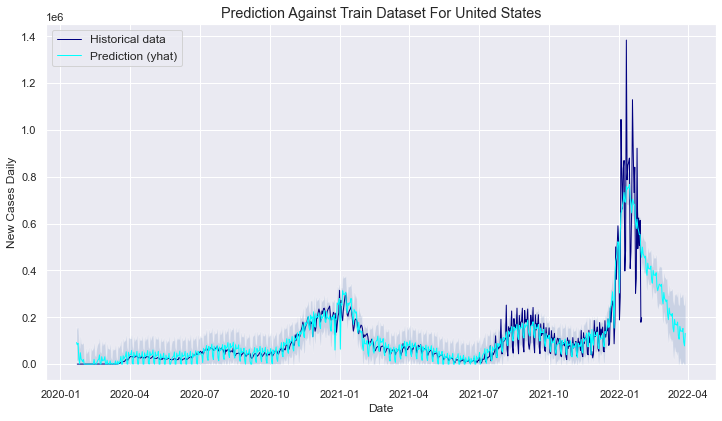

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(top=0.95)

ax.set_title('Prediction Against Train Dataset For United States', fontsize = 'large')
ax.plot(Train_US.ds, Train_US.y, color='navy', lw=1, label='Historical data')

ax.plot(forecast_US_h0.ds, forecast_US_h0.yhat, color= 'aqua',  lw=1, label='Prediction (yhat)')
ax.fill_between(forecast_US_h0.ds, forecast_US_h0.yhat_lower, forecast_US_h0.yhat_upper, alpha=0.2)

ax.legend(loc='upper left', fontsize='medium')

plt.xlabel('Date')
plt.ylabel('New Cases Daily')

In [12]:
dateFrom = "2022-02-01"
dateTo = "2022-03-29"
country = "United States"
Test_US = covidDF.copy()
Test_US = Test_US.loc[covidDF['location'] == country, ['location','date','total_cases', 'new_cases', 
                                                       'total_cases_per_million', 'hosp_patients', 
                                                       'new_tests', 'people_fully_vaccinated', 
                                                       'stringency_index', 'population', 'gdp_per_capita']]
    
Test_US = Test_US[(Test_US['date'] >= dateFrom) & (Test_US['date'] <= dateTo)]

print("Data Dimensions: ", Test_US.shape)
Test_US.head()

Data Dimensions:  (57, 11)


,location,date,total_cases,new_cases,total_cases_per_million,hosp_patients,new_tests,people_fully_vaccinated,stringency_index,population,gdp_per_capita
168728,United States,2022-02-01,75422719.0,325381.0,226552.430,120532.0,1767904.0,213708407.0,58.8,332915074.0,54225.446
168729,United States,2022-02-02,75752221.0,329502.0,227542.178,117188.0,1887235.0,213860921.0,58.8,332915074.0,54225.446
168730,United States,2022-02-03,76027012.0,274791.0,228367.587,112677.0,1596512.0,213999120.0,58.8,332915074.0,54225.446
168731,United States,2022-02-04,76381952.0,354940.0,229433.744,107688.0,1478887.0,214181163.0,58.8,332915074.0,54225.446
168732,United States,2022-02-05,76468358.0,86406.0,229693.288,101694.0,1117050.0,214312254.0,58.8,332915074.0,54225.446


Text(0, 0.5, 'New Cases Daily')

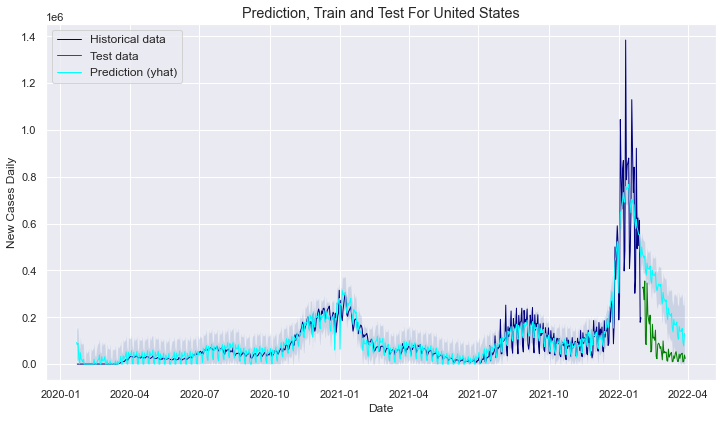

In [50]:
fig, ax = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(top=0.95)

ax.set_title('Prediction, Train and Test For United States', fontsize = 'large')
ax.plot(Train_US.ds, Train_US.y, color='navy', lw=1, label='Historical data')

ax.plot(Test_US.date, Test_US.new_cases, color='green', lw=1, label='Test data')

ax.plot(forecast_US_h0.ds, forecast_US_h0.yhat, color= 'aqua',  lw=1, label='Prediction (yhat)')
ax.fill_between(forecast_US_h0.ds, forecast_US_h0.yhat_lower, forecast_US_h0.yhat_upper, alpha=0.2)

ax.legend(loc='upper left', fontsize='medium')

plt.xlabel('Date')
plt.ylabel('New Cases Daily')

### Replacing Holidays with COVID-19 Lockdown in United States

In [14]:
Covid_lockdown_US = pd.DataFrame({
        'holiday': 'covid',
        'ds':  pd.date_range(start='2020-03-15', 
                             end='2020-05-01',
                             freq='D'),
        'lower_window': 0,
        'upper_window': 0,
        'prior_scale': 1 
        })

In [15]:
# instantiate the model with holidays of US and fit the timeseries
model_US_ld = Prophet(daily_seasonality = True, changepoint_range = 1, changepoint_prior_scale = 0.5, holidays = Covid_lockdown_US)
# model_US_ld.add_country_holidays(country_name='US')
model_US_ld.fit(Train_US)

# create a future data frame 
future_US_ld = model_US_ld.make_future_dataframe(periods = 57)
forecast_US_ld = model_US_ld.predict(future_US_ld)

# display the most critical output columns from the forecast
forecast_US_ld[['ds','yhat','yhat_lower','yhat_upper']].head()

C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,96967.758344,25360.713814,171419.195989
1,2020-01-23,85570.600727,7234.430892,160289.806011
2,2020-01-24,87660.820391,11523.647511,161143.542371
3,2020-01-25,24905.840362,-49756.880368,98933.034143
4,2020-01-26,4898.966982,-76086.200986,75347.813759


C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


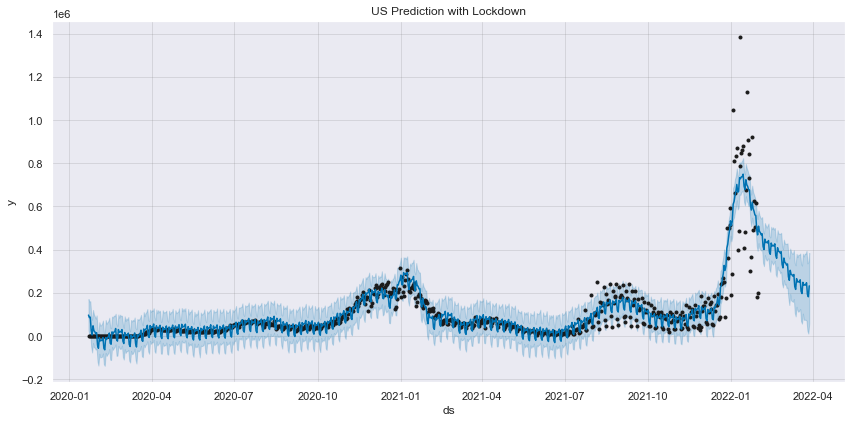

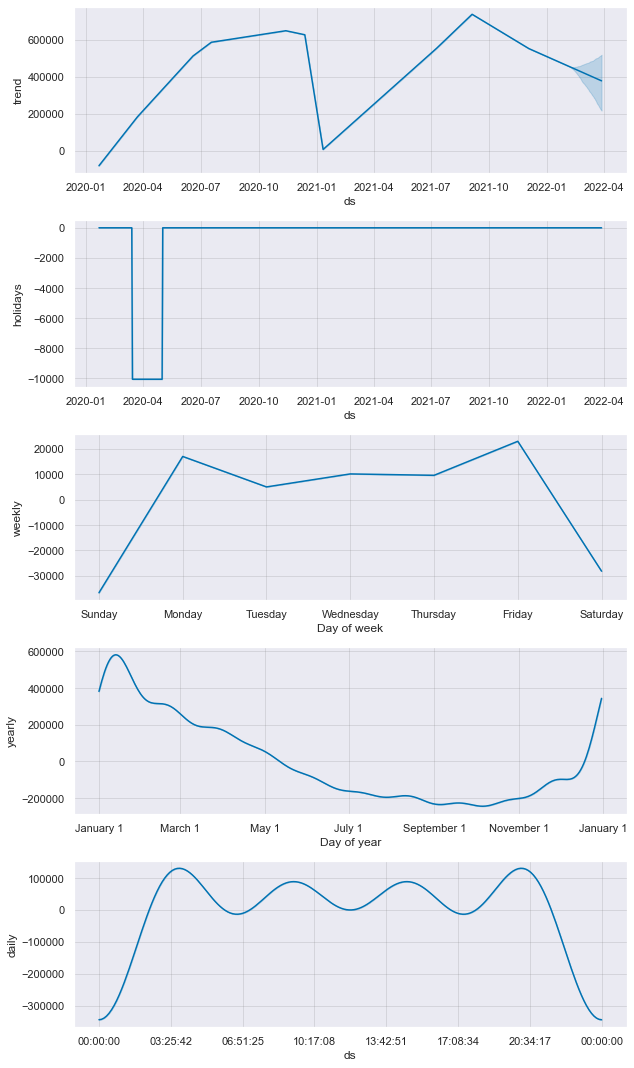

In [49]:
# plot

fig = fbplot(model_US_ld, forecast_US_ld, figsize=(12, 6))
ax = fig.gca()
ax.set_title("US Prediction with Lockdown")

fig = model_US_ld.plot_components(forecast_US_ld)

Holiday in this instance is actually the lockdown period and as what the news have often reported, lockdowns are effective in decreasing number of daily COVID-19 cases since lesser people are interacting which is the main cause of the spread of the COVID-19 virus.

### Comparing the Predictions

Text(0.5, 1.0, 'Model with US Lockdown')

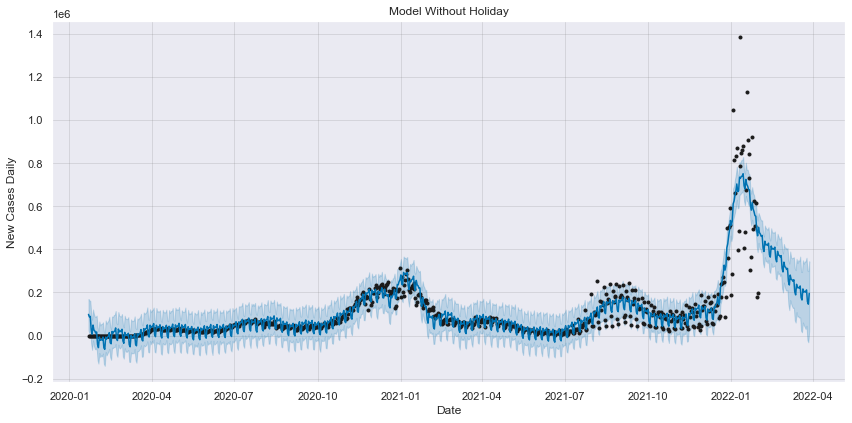

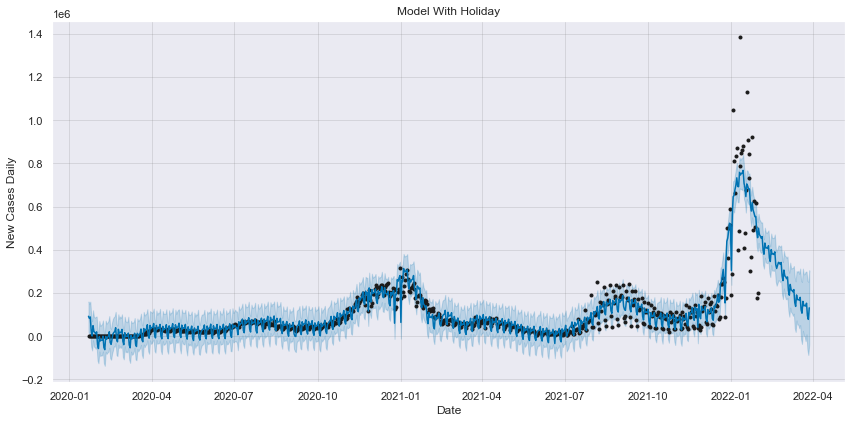

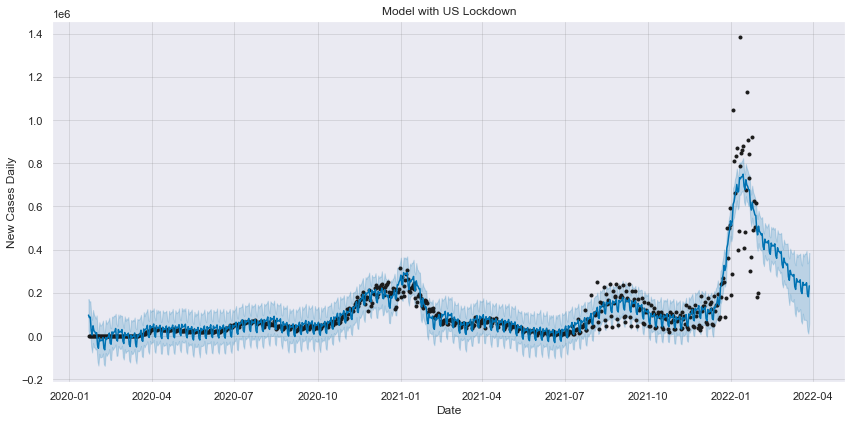

In [48]:
# plot

fig = fbplot(model_US, forecast_US, figsize=(12, 6), xlabel = 'Date', ylabel = 'New Cases Daily')
ax = fig.gca()
ax.set_title("Model Without Holiday")

fig2 = fbplot(model_US_h, forecast_US_h, figsize=(12, 6), xlabel = 'Date', ylabel = 'New Cases Daily')
ax2 = fig2.gca()
ax2.set_title("Model With Holiday")

fig3 = fbplot(model_US_ld, forecast_US_ld, figsize=(12, 6), xlabel = 'Date', ylabel = 'New Cases Daily')
ax3 = fig3.gca()
ax3.set_title("Model with US Lockdown")

When comparing the charts, we observe that the main driving force for the model to predict future values is the trend in the past data.
Possible reason why holidays did not play such a major factor could be that the dataset does not have enough years to show how how the holidays will affect the number of daily cases.
For lockdown, it could be that there is only one lockdown period for United States. Therefore, there were no future period to show how it might affect COVID-19 cases.

## Testing the Prophet Model on United Kingdom Dataset

### Dateset Preparation

In [18]:
dateFrom = "2020-01-22"
dateTo = "2022-01-30"
country = "United Kingdom"
UKcovidDF = covidDF.copy()
UKcovidDF = UKcovidDF.loc[UKcovidDF['location'] == country, ['location','date','total_cases', 'new_cases', 
                                                             'total_cases_per_million', 'hosp_patients', 
                                                             'new_tests', 'people_fully_vaccinated', 
                                                             'stringency_index', 'population', 'gdp_per_capita']]
    
Train_UK = UKcovidDF.copy()
Train_UK = Train_UK[['date', 'new_cases']]
Train_UK = Train_UK[(Train_UK['date'] >= dateFrom) & (Train_UK['date'] <= dateTo)]
Train_UK = Train_UK.rename(columns={'date': 'ds', 'new_cases': 'y'})
Train_UK = Train_UK.reset_index(drop=True)

print("Data Dimensions: ", Train_UK.shape)

Train_UK.head()

Data Dimensions:  (731, 2)


,ds,y
0,2020-01-31,2.0
1,2020-02-01,0.0
2,2020-02-02,0.0
3,2020-02-03,6.0
4,2020-02-04,0.0


In [19]:
dateFrom = "2022-02-01"
dateTo = "2022-03-29"
country = "United Kingdom"
Test_UK = covidDF.copy()
Test_UK = Test_UK.loc[covidDF['location'] == country, ['location','date','total_cases', 'new_cases', 
                                                     'total_cases_per_million', 'hosp_patients', 
                                                     'new_tests', 'people_fully_vaccinated', 
                                                     'stringency_index', 'population', 'gdp_per_capita']]
    
Test_UK = Test_UK[(Test_UK['date'] >= dateFrom) & (Test_UK['date'] <= dateTo)]

print("Data Dimensions: ", Test_UK.shape)

Test_UK.head()

Data Dimensions:  (57, 11)


,location,date,total_cases,new_cases,total_cases_per_million,hosp_patients,new_tests,people_fully_vaccinated,stringency_index,population,gdp_per_capita
167916,United Kingdom,2022-02-01,17470395.0,112819.0,256137.432,15486.0,1252759.0,48467140.0,42.13,68207114.0,39753.244
167917,United Kingdom,2022-02-02,17557729.0,87334.0,257417.855,15097.0,1388657.0,48494414.0,42.13,68207114.0,39753.244
167918,United Kingdom,2022-02-03,17650867.0,93138.0,258783.373,14909.0,1330145.0,48520513.0,42.13,68207114.0,39753.244
167919,United Kingdom,2022-02-04,17733357.0,82490.0,259992.777,14477.0,1114488.0,48549694.0,42.13,68207114.0,39753.244
167920,United Kingdom,2022-02-05,17793844.0,60487.0,260879.591,13995.0,886095.0,48577889.0,42.13,68207114.0,39753.244


### COVID-19 Daily Cases in United Kingdom

Text(0, 0.5, 'New Cases Daily')

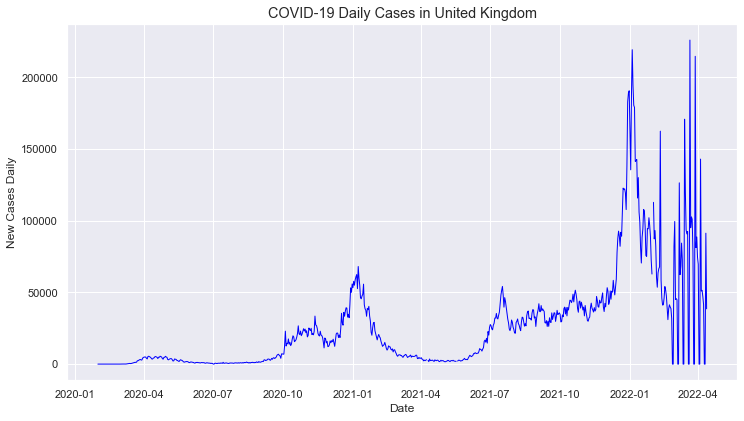

In [47]:
fig, ax = plt.subplots(figsize=(12,6))
fig.subplots_adjust(top=0.95)

ax.set_title('COVID-19 Daily Cases in United Kingdom', fontsize = 'large')
ax.plot(UKcovidDF.date, UKcovidDF.new_cases, color='blue', lw=1)

plt.xlabel('Date')
plt.ylabel('New Cases Daily')

In [21]:
# instantiate the model with holidays of US and fit the timeseries
model_UK = Prophet(daily_seasonality = True, changepoint_range = 1, changepoint_prior_scale = 0.5)
model_UK.add_country_holidays(country_name='UK')
model_UK.fit(Train_UK)

# create a future data frame 
future_UK = model_UK.make_future_dataframe(periods = 57)
forecast_UK = model_UK.predict(future_UK)

# display the most critical output columns from the forecast
forecast_UK[['ds','yhat','yhat_lower','yhat_upper']].head()

C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-31,743.044341,-6516.139487,8615.283676
1,2020-02-01,-1459.710433,-9569.019739,5857.721370
2,2020-02-02,-2666.676277,-9619.826854,4987.819095
3,2020-02-03,-1607.789353,-9399.554948,5906.634349
4,2020-02-04,-1249.954427,-8549.451997,6062.389684


C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


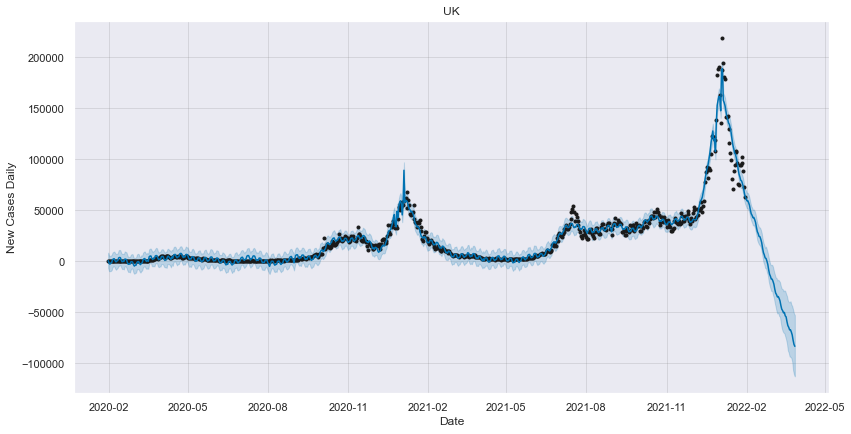

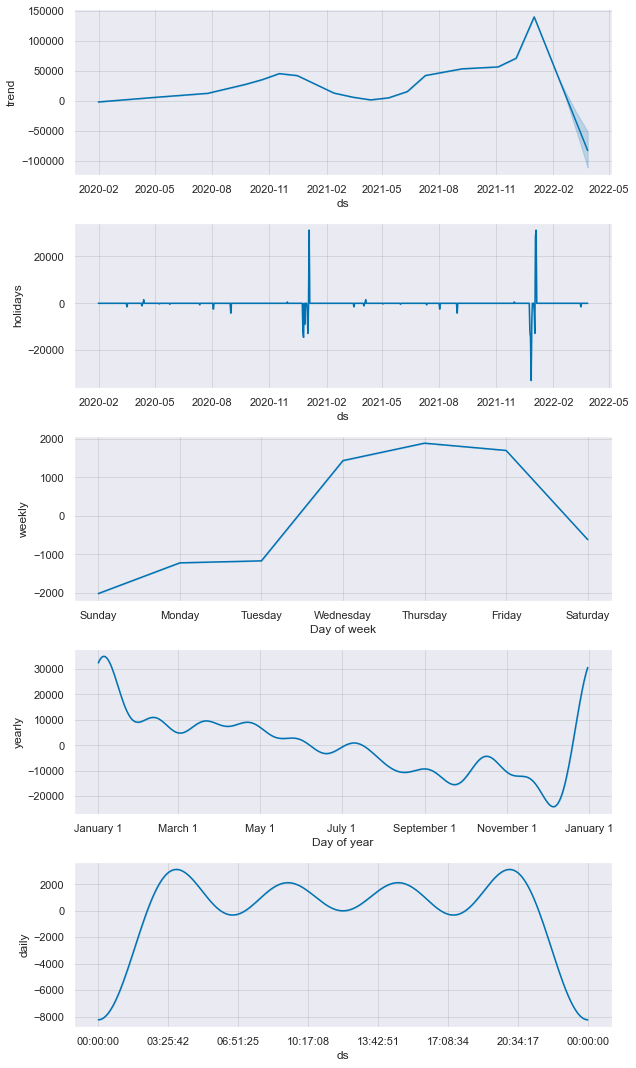

In [46]:
fig = fbplot(model_UK, forecast_UK, figsize=(12, 6), xlabel = 'Date', ylabel = 'New Cases Daily')
ax = fig.gca()
ax.set_title("UK")

fig = model_UK.plot_components(forecast_UK)

Some trend analysis for United Kingdom are that only some holidays seems to have a relationship with daily COVID-19 cases.
Additionally, COVID-19 cases in weekly analysis show that it usually picks up around Tuesday.

In [23]:
# converting negative values to zero as daily covid cases cannot be negative

forecast_UK_0 = forecast_UK.copy()
forecast_UK_0.loc[forecast_UK_0["yhat"] < 0, "yhat"] = 0
forecast_UK_0.loc[forecast_UK_0["yhat_lower"] < 0, "yhat_lower"] = 0
forecast_UK_0.loc[forecast_UK_0["yhat_upper"] < 0, "yhat_upper"] = 0
forecast_UK_0.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Battle of the Boyne [Northern Ireland],Battle of the Boyne [Northern Ireland]_lower,Battle of the Boyne [Northern Ireland]_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Boxing Day (Observed),Boxing Day (Observed)_lower,Boxing Day (Observed)_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),Christmas Day (Observed)_lower,Christmas Day (Observed)_upper,Easter Monday [England/Wales/Northern Ireland],Easter Monday [England/Wales/Northern Ireland]_lower,Easter Monday [England/Wales/Northern Ireland]_upper,Good Friday,Good Friday_lower,Good Friday_upper,Late Summer Bank Holiday [England/Wales/Northern Ireland],Late Summer Bank Holiday [England/Wales/Northern Ireland]_lower,Late Summer Bank Holiday [England/Wales/Northern Ireland]_upper,May Day,May Day_lower,May Day_upper,New Year Holiday [Scotland],New Year Holiday [Scotland]_lower,New Year Holiday [Scotland]_upper,New Year Holiday [Scotland] (Observed),New Year Holiday [Scotland] (Observed)_lower,New Year Holiday [Scotland] (Observed)_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,New Year's Day (Observed),New Year's Day (Observed)_lower,New Year's Day (Observed)_upper,Platinum Jubilee of Elizabeth II,Platinum Jubilee of Elizabeth II_lower,Platinum Jubilee of Elizabeth II_upper,Spring Bank Holiday,Spring Bank Holiday_lower,Spring Bank Holiday_upper,St. Andrew's Day [Scotland],St. Andrew's Day [Scotland]_lower,St. Andrew's Day [Scotland]_upper,St. Patrick's Day [Northern Ireland],St. Patrick's Day [Northern Ireland]_lower,St. Patrick's Day [Northern Ireland]_upper,Summer Bank Holiday [Scotland],Summer Bank Holiday [Scotland]_lower,Summer Bank Holiday [Scotland]_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
783,2022-03-24,-72395.205208,0.0,0.0,-97633.061761,-44430.401088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3201.734562,3201.734562,3201.734562,-8245.96044,-8245.96044,-8245.96044,0.0,0.0,0.0,1888.692759,1888.692759,1888.692759,9559.002243,9559.002243,9559.002243,0.0,0.0,0.0,0.0
784,2022-03-25,-74985.953999,0.0,0.0,-100910.892468,-46139.906038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2925.433697,2925.433697,2925.433697,-8245.96044,-8245.96044,-8245.96044,0.0,0.0,0.0,1699.871017,1699.871017,1699.871017,9471.523120,9471.523120,9471.523120,0.0,0.0,0.0,0.0
785,2022-03-26,-77576.702789,0.0,0.0,-104486.326058,-48058.331216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,483.206961,483.206961,483.206961,-8245.96044,-8245.96044,-8245.96044,0.0,0.0,0.0,-615.933175,-615.933175,-615.933175,9345.100576,9345.100576,9345.100576,0.0,0.0,0.0,0.0
786,2022-03-27,-80167.451580,0.0,0.0,-107709.523099,-49918.153471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1078.565195,-1078.565195,-1078.565195,-8245.96044,-8245.96044,-8245.96044,0.0,0.0,0.0,-2018.861279,-2018.861279,-2018.861279,9186.256525,9186.256525,9186.256525,0.0,0.0,0.0,0.0
787,2022-03-28,-82758.200370,0.0,0.0,-110799.777315,-51829.320271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

Text(0, 0.5, 'New Cases Daily')

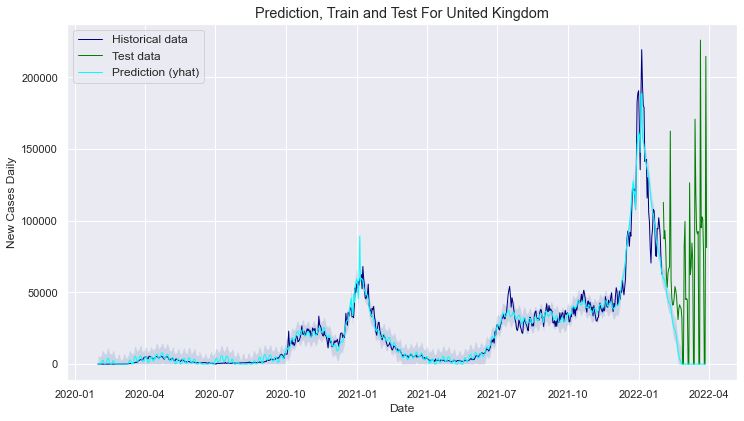

In [45]:
fig, ax = plt.subplots(figsize=(12,6))
fig.subplots_adjust(top=0.95)

ax.set_title('Prediction, Train and Test For United Kingdom', fontsize = 'large')
ax.plot(Train_UK.ds, Train_UK.y, color='navy', lw=1, label='Historical data')

ax.plot(Test_UK.date, Test_UK.new_cases, color='green', lw=1, label='Test data')

ax.plot(forecast_UK_0.ds, forecast_UK_0.yhat, color= 'aqua',  lw=1, label='Prediction (yhat)')
ax.fill_between(forecast_UK_0.ds, forecast_UK_0.yhat_lower, forecast_UK_0.yhat_upper, alpha=0.2)

ax.legend(loc='upper left', fontsize='medium')

plt.xlabel('Date')
plt.ylabel('New Cases Daily')

When using the Prophet Model on United Kingdom dataset we can see that the accuracy of the model is much lower compared to when using it on United States dataset.
Although, the accuracy is lower but this does not mean that the model is not useful. COVID-19 cases have a lot of factors to them which could be more important than previous trends and holiday dates.
Additionally, we can see that manually changing negative values to zero is more logical as the dataset is on COVID-19 cases.
Therefore, the next part we will be exploring additional regressors.

## Stringency Index

### Adding a Regressor to Prophet Model

Stringency index is the calculation of how strict the COVID-19 related policies implemented are and it could be a huge factor to predicting number of new daily cases as shown in the exploratory part that there is some relationship.

We will first test it on United States dataset because the Prophet model seems to have better accuracy when it comes to United States dataset.

In [25]:
SI_US = UScovidDF[['date', 'new_cases', 'stringency_index']]

dateFrom = "2020-01-22"
dateTo = "2022-01-30"

Past_SI_US = SI_US.copy()
Past_SI_US = Past_SI_US[(Past_SI_US['date'] >= dateFrom) & (Past_SI_US['date'] <= dateTo)]
Past_SI_US = Past_SI_US.rename(columns={'date': 'ds', 'new_cases': 'y'})
Past_SI_US['date_index'] = Past_SI_US['ds']
Past_SI_US = Past_SI_US.set_index('date_index')

dateFrom = "2022-02-01"
dateTo = "2022-03-29"

Future_SI_US = SI_US.copy()
Future_SI_US = Future_SI_US[(Future_SI_US['date'] >= dateFrom) & (Future_SI_US['date'] <= dateTo)]
Future_SI_US['date_index'] = Future_SI_US['date']
Future_SI_US = Future_SI_US.set_index('date_index')

In [26]:
Future_SI_US.shape

(57, 3)

In [27]:
def function_si_US(ds):
    date = (pd.to_datetime(ds)).date()
    
    if Past_SI_US[date:].empty:
        return Future_SI_US[date:]['stringency_index'].values[0]
    else:
        return Past_SI_US[date:]['stringency_index'].values[0]
    
    return 0

In [28]:
model_US_SI = Prophet(daily_seasonality = True, changepoint_range = 1, changepoint_prior_scale = 0.5)
model_US_SI.add_regressor('stringency_index')
model_US_SI.fit(Past_SI_US)

future_US_SI = model_US_SI.make_future_dataframe(periods = 57)
future_US_SI['stringency_index'] = future_US_SI['ds'].apply(function_si_US)

forecast_US_SI = model_US_SI.predict(future_US_SI)
forecast_US_SI[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
792,2022-03-24,234960.316901,87825.431574,383898.567360
793,2022-03-25,246156.633940,96253.125734,400824.077265
794,2022-03-26,192562.201657,24154.806866,359288.620127
795,2022-03-27,181144.162421,26925.981455,343289.853162
796,2022-03-28,231826.786497,66754.549669,396798.909437


C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


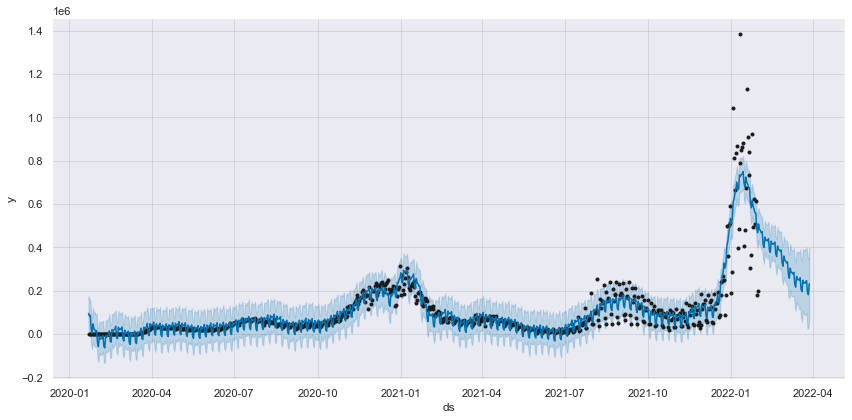

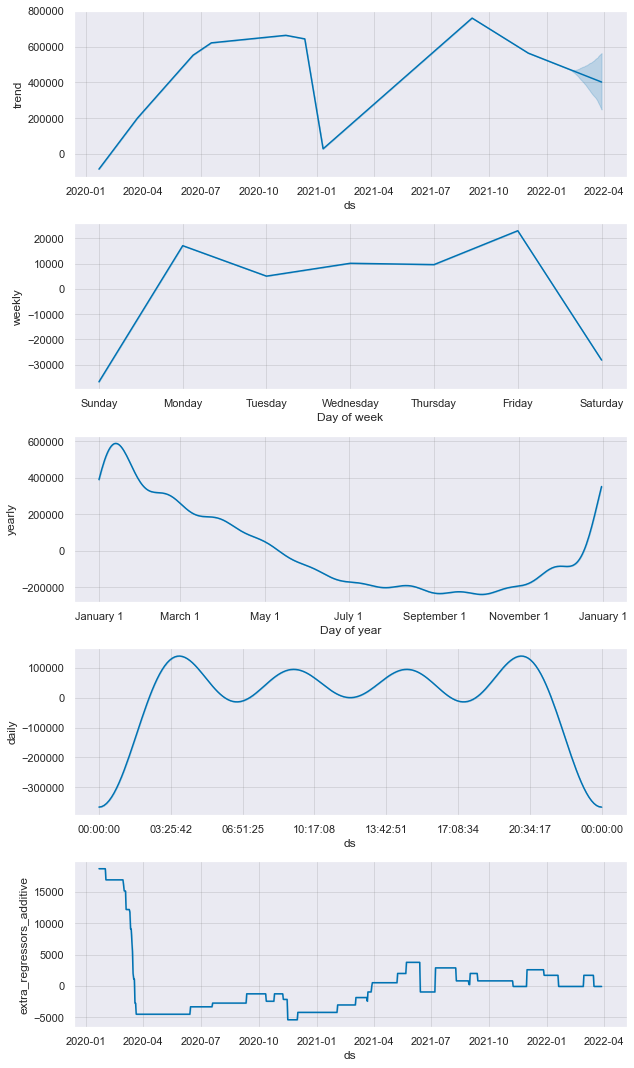

In [44]:
fig = fbplot(model_US_SI, forecast_US_SI, figsize=(12,6))

fig = model_US_SI.plot_components(forecast_US_SI)

In [30]:
# converting negative values to zero as daily covid cases cannot be negative

forecast_US_SI0 = forecast_US_SI.copy()
forecast_US_SI0.loc[forecast_US_SI0["yhat"] < 0, "yhat"] = 0
forecast_US_SI0.loc[forecast_US_SI0["yhat_lower"] < 0, "yhat_lower"] = 0
forecast_US_SI0.loc[forecast_US_SI0["yhat_upper"] < 0, "yhat_upper"] = 0
forecast_US_SI0.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,stringency_index,stringency_index_lower,stringency_index_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
792,2022-03-24,407198.312613,87825.431574,383898.567360,278262.154062,550231.151029,-172237.995712,-172237.995712,-172237.995712,-366206.891147,-366206.891147,-366206.891147,-70.853172,-70.853172,-70.853172,-70.853172,-70.853172,-70.853172,9604.692341,9604.692341,9604.692341,184435.056266,184435.056266,184435.056266,0.0,0.0,0.0,234960.316901
793,2022-03-25,405806.313637,96253.125734,400824.077265,271533.202364,553617.037718,-159649.679697,-159649.679697,-159649.679697,-366206.891147,-366206.891147,-366206.891147,-70.853172,-70.853172,-70.853172,-70.853172,-70.853172,-70.853172,22999.239119,22999.239119,22999.239119,183628.825503,183628.825503,183628.825503,0.0,0.0,0.0,246156.633940
794,2022-03-26,404414.314662,24154.806866,359288.620127,263048.488870,557027.378598,-211852.113004,-211852.113004,-211852.113004,-366206.891147,-366206.891147,-366206.891147,-70.853172,-70.853172,-70.853172,-70.853172,-70.853172,-70.853172,-28121.123128,-28121.123128,-28121.123128,182546.754443,182546.754443,182546.754443,0.0,0.0,0.0,192562.201657
795,2022-03-27,403022.315686,26925.981455,343289.853162,256242.311020,559660.615844,-221878.153265,-221878.153265,-221878.153265,-366206.891147,-366206.891147,-366206.891147,-70.853172,-70.853172,-70.853172,-70.853172,-70.853172,-70.853172,-36743.323155,-36743.323155,-36743.323155,181142.914208,181142.914208,181142.914208,0.0,0.0,0.0,181144.162421
796,2022-03-28,401630.316711,66754.549669,396798.909437,248274.674756,563192.585243,-169803.530214,-169803.530214,-169803.530214,-366206.891147,-366206.891147,-366206.891147,-70.853172,-70.853172,-70.853172,-70.853172,-70.853172,-70.853172,17091.961664,17091.961664,17091.961664,179382.252441,179382.252441,179382.252441,0.0,0.0,0.0,231826.786497


Text(0, 0.5, 'New Cases Daily')

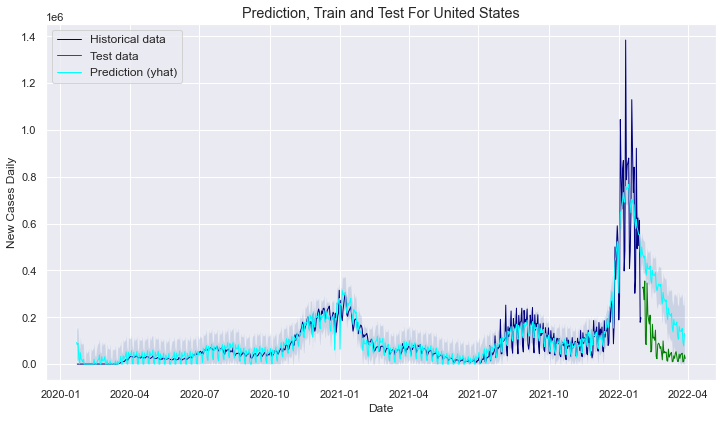

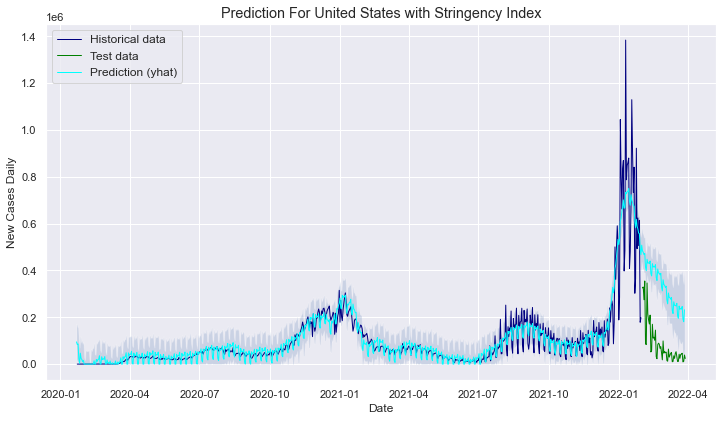

In [43]:
fig, ax = plt.subplots(figsize=(12,6))
fig.subplots_adjust(top=0.95)

ax.set_title('Prediction, Train and Test For United States', fontsize = 'large')
ax.plot(Train_US.ds, Train_US.y, color='navy', lw=1, label='Historical data')

ax.plot(Test_US.date, Test_US.new_cases, color='green', lw=1, label='Test data')

ax.plot(forecast_US_h0.ds, forecast_US_h0.yhat, color= 'aqua',  lw=1, label='Prediction (yhat)')
ax.fill_between(forecast_US_h0.ds, forecast_US_h0.yhat_lower, forecast_US_h0.yhat_upper, alpha=0.2)

ax.legend(loc='upper left', fontsize='medium')

plt.xlabel('Date')
plt.ylabel('New Cases Daily')

fig, ax = plt.subplots(figsize=(12,6))
fig.subplots_adjust(top=0.95)

ax.set_title('Prediction For United States with Stringency Index', fontsize = 'large')
ax.plot(Past_SI_US.ds, Past_SI_US.y, color='navy', lw=1, label='Historical data')

ax.plot(Future_SI_US.date, Future_SI_US.new_cases, color='green', lw=1, label='Test data')

ax.plot(forecast_US_SI0.ds, forecast_US_SI0.yhat, color= 'aqua',  lw=1, label='Prediction (yhat)')
ax.fill_between(forecast_US_SI0.ds, forecast_US_SI0.yhat_lower, forecast_US_SI0.yhat_upper, alpha=0.2)

ax.legend(loc='upper left', fontsize='medium')

plt.xlabel('Date')
plt.ylabel('New Cases Daily')

From the graph we can see that Stringency Index seems to not play a major role in Prophet Model's prediction of new cases daily for COVID-19.

## Using the Prophet Model to Predict Singapore COVID-19 Cases

Testing the Prophet Model on United States and United Kingdom Dataset we have found out that holidays might not affect the prediction but it does show some analysis, stringency index does not affect the prediction as well.
Therefore, to use the Prophet Model to predict number of COVID-19 cases for the next 60 days we will be using only the new cases daily and holidays.

### Dateset Preparation

In [32]:
dateFrom = "2020-01-22"
dateTo = "2022-03-29"
country = "Singapore"
SGcovidDF = covidDF.copy()
SGcovidDF = SGcovidDF.loc[SGcovidDF['location'] == country, ['location','date','total_cases', 'new_cases', 
                                                             'total_cases_per_million', 'hosp_patients', 
                                                             'new_tests', 'people_fully_vaccinated', 
                                                             'stringency_index', 'population', 'gdp_per_capita']]

Train_SG = SGcovidDF.copy()
Train_SG = Train_SG[['date', 'new_cases']]
Train_SG = Train_SG[(Train_SG['date'] >= dateFrom) & (Train_SG['date'] <= dateTo)]
Train_SG = Train_SG.rename(columns={'date': 'ds', 'new_cases': 'y'})
Train_SG = Train_SG.reset_index(drop=True)
print("Data Dimensions: ", Train_SG.shape)

Train_SG.head()

Data Dimensions:  (797, 2)


,ds,y
0,2020-01-23,1.0
1,2020-01-24,2.0
2,2020-01-25,0.0
3,2020-01-26,1.0
4,2020-01-27,1.0


### COVID-19 Daily Cases in Singapore

Text(0, 0.5, 'New Cases Daily')

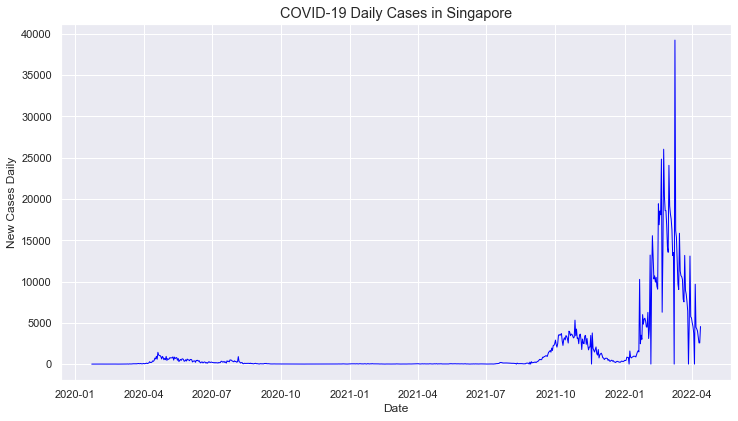

In [42]:
fig, ax = plt.subplots(figsize=(12,6))
fig.subplots_adjust(top=0.95)

ax.set_title('COVID-19 Daily Cases in Singapore', fontsize = 'large')
ax.plot(SGcovidDF.date, SGcovidDF.new_cases, color='blue', lw=1)

plt.xlabel('Date')
plt.ylabel('New Cases Daily')

In [34]:
# instantiate the model with holidays of US and fit the timeseries
model_SG = Prophet(daily_seasonality = True, changepoint_range = 1, changepoint_prior_scale = 0.5)
model_SG.add_country_holidays(country_name='SG')
model_SG.fit(Train_SG)

# create a future data frame 
future_SG = model_SG.make_future_dataframe(periods = 60)
forecast_SG = model_SG.predict(future_SG)

# display the most critical output columns from the forecast
forecast_SG[['ds','yhat','yhat_lower','yhat_upper']].head()

C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-23,270.384097,-1754.532455,2101.487072
1,2020-01-24,369.704242,-1521.032786,2363.836657
2,2020-01-25,-979.755671,-2900.670453,969.397610
3,2020-01-26,-1320.236437,-3179.262582,576.031999
4,2020-01-27,47.685159,-1811.791587,1892.817842


C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\jabez\anaconda3\envs\myenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


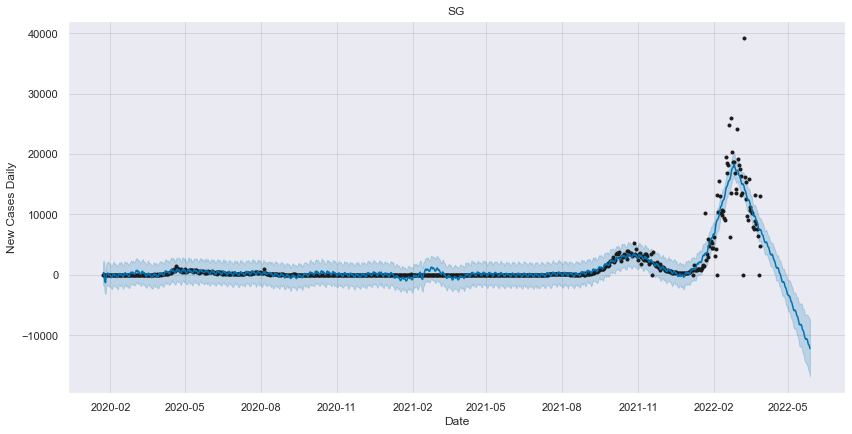

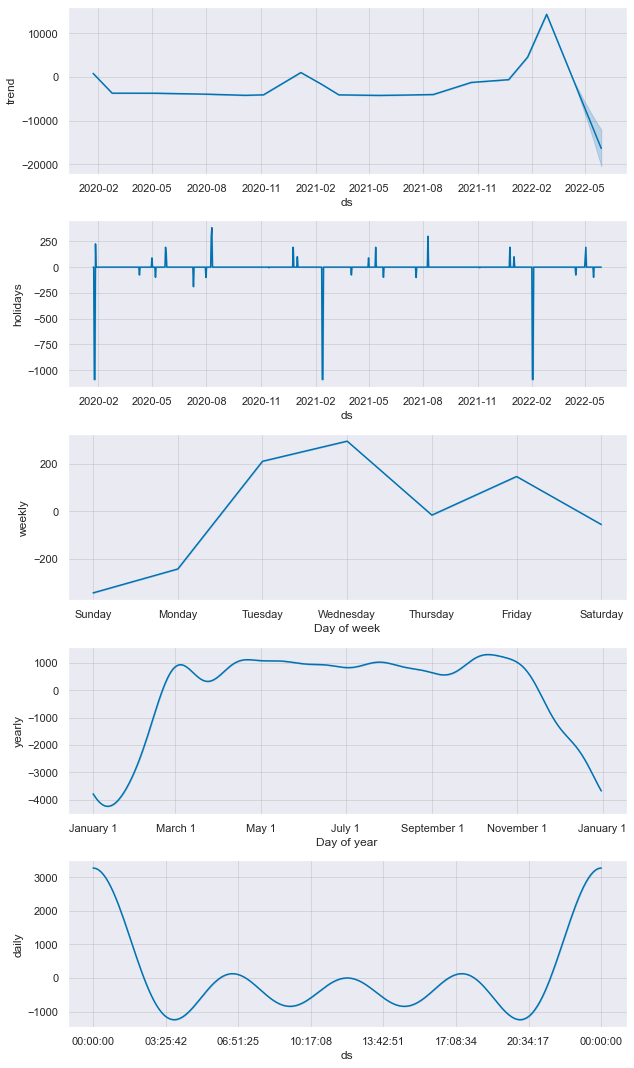

In [41]:
fig = fbplot(model_SG, forecast_SG, figsize=(12, 6), xlabel = 'Date', ylabel = 'New Cases Daily')
ax = fig.gca()
ax.set_title("SG")

fig = model_SG.plot_components(forecast_SG)

In [36]:
# converting negative values to zero as daily covid cases cannot be negative

forecast_SG0 = forecast_SG.copy()
forecast_SG0.loc[forecast_SG0["yhat"] < 0, "yhat"] = 0
forecast_SG0.loc[forecast_SG0["yhat_lower"] < 0, "yhat_lower"] = 0
forecast_SG0.loc[forecast_SG0["yhat_upper"] < 0, "yhat_upper"] = 0
forecast_SG0.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Chinese New Year,Chinese New Year_lower,Chinese New Year_upper,Chinese New Year [In lieu],Chinese New Year [In lieu]_lower,Chinese New Year [In lieu]_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day [In lieu],Christmas Day [In lieu]_lower,Christmas Day [In lieu]_upper,Deepavali,Deepavali_lower,Deepavali_upper,Good Friday,Good Friday_lower,Good Friday_upper,Hari Raya Haji,Hari Raya Haji_lower,Hari Raya Haji_upper,Hari Raya Puasa,Hari Raya Puasa_lower,Hari Raya Puasa_upper,Hari Raya Puasa [In lieu],Hari Raya Puasa [In lieu]_lower,Hari Raya Puasa [In lieu]_upper,Labour Day,Labour Day_lower,Labour Day_upper,Labour Day [In lieu],Labour Day [In lieu]_lower,Labour Day [In lieu]_upper,National Day,National Day_lower,National Day_upper,National Day [In lieu],National Day [In lieu]_lower,National Day [In lieu]_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,Polling Day,Polling Day_lower,Polling Day_upper,Vesak Day,Vesak Day_lower,Vesak Day_upper,Vesak Day [In lieu],Vesak Day [In lieu]_lower,Vesak Day [In lieu]_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
852,2022-05-24,-15058.928736,0.0,0.0,-18622.965318,-11259.196824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4499.143294,4499.143294,4499.143294,3274.169491,3274.169491,3274.169491,0.0,0.0,0.0,211.221649,211.221649,211.221649,1013.752154,1013.752154,1013.752154,0.0,0.0,0.0,0.0
853,2022-05-25,-15393.010489,0.0,0.0,-19040.303288,-11436.838572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4576.009567,4576.009567,4576.009567,3274.169491,3274.169491,3274.169491,0.0,0.0,0.0,295.919972,295.919972,295.919972,1005.920104,1005.920104,1005.920104,0.0,0.0,0.0,0.0
854,2022-05-26,-15727.092242,0.0,0.0,-19471.468555,-11666.428289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4257.032966,4257.032966,4257.032966,3274.169491,3274.169491,3274.169491,0.0,0.0,0.0,-15.192979,-15.192979,-15.192979,998.056454,998.056454,998.056454,0.0,0.0,0.0,0.0
855,2022-05-27,-16061.173996,0.0,0.0,-19928.102440,-11868.561084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4411.671195,4411.671195,4411.671195,3274.169491,3274.169491,3274.169491,0.0,0.0,0.0,147.193995,147.193995,147.193995,990.307710,990.307710,990.307710,0.0,0.0,0.0,0.0
856,2022-05-28,-16395.255749,0.0,0.0,-20433.209039,-12081.007684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4202.335459,4202.335459,4202.335459,3274.169491,3274.169491,3274.169491,0.0,0.0,0.0,-54.647789,-54.647789,-54.647789,982.813757,982.813757,982.813757,0.0,0.0,0.0,0.0


Text(0, 0.5, 'New Cases Daily')

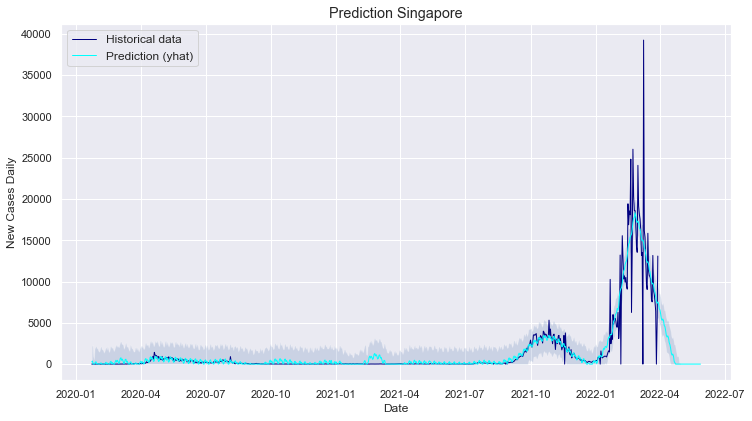

In [40]:
fig, ax = plt.subplots(figsize=(12,6))
fig.subplots_adjust(top=0.95)

ax.set_title('Prediction Singapore', fontsize = 'large')
ax.plot(Train_SG.ds, Train_SG.y, color='navy', lw=1, label='Historical data')

ax.plot(forecast_SG0.ds, forecast_SG0.yhat, color= 'aqua',  lw=1, label='Prediction (yhat)')
ax.fill_between(forecast_SG0.ds, forecast_SG0.yhat_lower, forecast_SG0.yhat_upper, alpha=0.2)

ax.legend(loc='upper left', fontsize='medium')

plt.xlabel('Date')
plt.ylabel('New Cases Daily')

The chart shows that the model predicts that Singapore would hit zero COVID-19 cases if the trend continues in less than 60 days.

In conclusion, Prophet is quite accurate in predicting whether the number of COVID-19 cases will increase or decrease in the upcoming months, but on some days COVID-19 cases might suddenly spike out of nowhere and Prophet cannot foresee that. COVID-19 cases might tweak over the 2 months that the model has forecasted, which might cause the number of cases to change.